## 课程论文

 请务必交到exer8文件夹下，**谢绝交到master下**
+ 请不要改动任何文件，拜托
+ 请于12月30日前先在github上提交
+ 请在元旦后提交纸质版，将本页面文件先打印为pdf格式，再去打印店付印
+ 请将论文模板和本页面文件一起装订，前者放上面，本页面文件放下面
+ 纸质版提交时间和地点请留意微信群通知

请写一下姓名和学号：
+ 姓名  黄鹏辉
+ 学号 0161918

### 样本均值分布的统计试验

+ 请将CEPS.csv数据读入python
+ 请从中随机抽取1000个数据
+ 请根据问卷从数据中挑选两个连续型变量（likert量表可以近似看作连续变量）
+ 计算这两个连续变量的均值
+ 重复随机抽取—计算均值这个过程30次，得到两个变量30个样本均值
+ 绘制这30个样本均值的直方图
+ 计算均值的均值和标准误

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [2]:
#导入数据后面选择的是a16,和a17所以在这里把他们取出来做缺失值的处理
sentinels= {'a16': [' '], 'a17': [' ']}
df = pd.read_csv('CEPS.csv',encoding='gb2312',na_values=sentinels)
df.head()

C:\Users\97657\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,194,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ids,clsids,schids,ctyids,frame,subsample,sweight,fall,grade9,stcog,...,steco_3c,stonly,stsib,stsibrank,stmedu,stfedu,stprhedu,stfdrunk,stprfight,stprrel
0,1,1,1,1,3,3,218.738892,0,0,11,...,3,1,,,3,3,3,1,1,2
1,2,1,1,1,3,3,216.518234,0,0,17,...,2,1,,,8,5,8,1,1,2
2,3,1,1,1,3,3,216.518234,0,0,12,...,2,2,1,3,3,3,3,1,1,1
3,4,1,1,1,3,3,218.738892,0,0,10,...,2,1,,,6,7,7,1,1,2
4,5,1,1,1,3,3,217.553040,0,0,10,...,3,1,,,7,8,8,1,1,2


In [3]:
#取1000个随机数
df1=df.sample(1000)
df1

,ids,clsids,schids,ctyids,frame,subsample,sweight,fall,grade9,stcog,...,steco_3c,stonly,stsib,stsibrank,stmedu,stfedu,stprhedu,stfdrunk,stprfight,stprrel
16577,16578,387,100,25,1,1,1614.552246,1,0,14,...,1,2,2,3,2,3,3,2,2,1
19047,19048,432,111,28,3,3,334.988861,1,0,5,...,2,1,,,7,7,7,1,1,2
1911,1912,51,13,4,1,1,1610.889771,1,1,6,...,2,2,1,1,3,3,3,1,1,1
13350,13351,311,80,20,3,3,319.091095,0,1,8,...,3,2,2,2,4,3,4,1,2,2
19034,19035,432,111,28,3,3,338.424561,1,0,13,...,3,1,,,4,6,6,1,1,2
17302,17303,400,103,26,1,1,3368.456055,0,0,2,...,1,2,,,1,2,2,1,1,2
4821,4822,129,33,9,2,2,73.548485,1,0,16,...,2,1,,,4,4,4,1,1,1
10540,10541,257,67,17,1,1,2151.991943,1,0,7,...,1,1,,,3,3,3,1,1,2
17116,17117,397,102,26,1,1,3422.799561,0,1,13,...,1,2,2,2,1,6,6,1,1,2
140,141,5,2,1,3,3,202.043365,0,0,14,...,3,1,,,4,8,8,1,1,2


In [4]:
#选择两个连续变量，这里选择的是a16过去一年有没有住过院和a17现在整体健康状况
x1=df1['a16']
print("过去一年有没有住过院变量的均值为",x1.mean())
x2=df1['a17']
print("现在整体健康状况的均值为",x2.mean())

过去一年有没有住过院变量的均值为 1.900502512562814
现在整体健康状况的均值为 4.023232323232323


In [5]:
#连续上面过程30次
mean_a16={}
mean_a17={}
for i in range(0,30):
    df1=df.sample(1000)
    print("第",i+1,"次结果")
    mean_a16_a=df1['a16'].mean()
    mean_a16[i+1]= mean_a16_a
    print("过去一年有没有住过院变量的均值为:",df1['a16'].mean())
    mean_a17_a=df1['a17'].mean()
    mean_a17[i+1]= mean_a17_a
    print("现在整体健康状况的均值为:",df1['a17'].mean())

第 1 次结果
过去一年有没有住过院变量的均值为: 1.9235412474849094
现在整体健康状况的均值为: 4.068686868686869
第 2 次结果
过去一年有没有住过院变量的均值为: 1.9133064516129032
现在整体健康状况的均值为: 4.049645390070922
第 3 次结果
过去一年有没有住过院变量的均值为: 1.9116465863453815
现在整体健康状况的均值为: 4.045317220543807
第 4 次结果
过去一年有没有住过院变量的均值为: 1.9139676113360324
现在整体健康状况的均值为: 4.039354187689203
第 5 次结果
过去一年有没有住过院变量的均值为: 1.9193548387096775
现在整体健康状况的均值为: 4.030333670374115
第 6 次结果
过去一年有没有住过院变量的均值为: 1.9182643794147325
现在整体健康状况的均值为: 4.050352467270896
第 7 次结果
过去一年有没有住过院变量的均值为: 1.9196787148594376
现在整体健康状况的均值为: 4.068479355488419
第 8 次结果
过去一年有没有住过院变量的均值为: 1.9257028112449799
现在整体健康状况的均值为: 4.038152610441767
第 9 次结果
过去一年有没有住过院变量的均值为: 1.905050505050505
现在整体健康状况的均值为: 4.093023255813954
第 10 次结果
过去一年有没有住过院变量的均值为: 1.9196787148594376
现在整体健康状况的均值为: 4.017119838872104
第 11 次结果
过去一年有没有住过院变量的均值为: 1.921765295887663
现在整体健康状况的均值为: 4.075528700906345
第 12 次结果
过去一年有没有住过院变量的均值为: 1.9163306451612903
现在整体健康状况的均值为: 4.002004008016032
第 13 次结果
过去一年有没有住过院变量的均值为: 1.9174219536757302
现在整体健康状况的均值为: 4.0020140986908

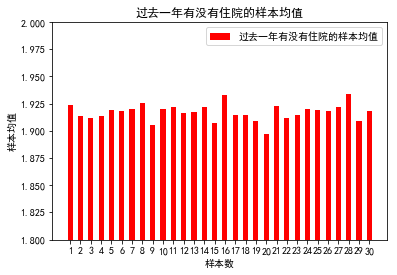

In [6]:
#绘制a16过去一年有没有住院的样本均值直方图
a16=np.arange(len(mean_a16.values()))
width=0.5
fig, ax = plt.subplots()
rects1 = ax.bar(a16 - width/2, mean_a16.values(), width, 
                color='red', label='过去一年有没有住院的样本均值')
ax.set_ylabel('样本均值')
ax.set_xlabel("样本数")
ax.set_title('过去一年有没有住院的样本均值')
ax.set_xticks(a16-0.25)
ax.set_xticklabels(mean_a16.keys())
ax.legend()
ax.set_ylim(1.8,2)#因为数据的差别很小所以对Y轴进行处理
def autolabel(rects, xpos='center'):
    for rect in rects:
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 2*a16,
                '{}'.format(nianling), ha=ha[xpos], va='bottom')
plt.show()



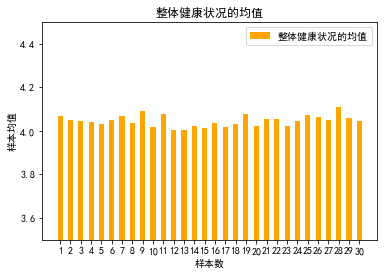

In [7]:
#绘制a17现在整体健康状况的均值的直方图
a17=np.arange(len(mean_a17.values()))
width=0.5
fig, ax = plt.subplots()
rects1 = ax.bar(a17 - width/2, mean_a17.values(), width, 
                color='orange', label='整体健康状况的均值')
ax.set_ylabel('样本均值')
ax.set_xlabel('样本数')
ax.set_title('整体健康状况的均值')
ax.set_xticks(a17-0.25)
ax.set_xticklabels(mean_a17.keys())
ax.legend()
ax.set_ylim(3.5,4.5)#同上一幅图对Y轴进行处理
def autolabel(rects, xpos='center'):
    for rect in rects:
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 2*a17,
                '{}'.format(nianling), ha=ha[xpos], va='bottom') 
plt.show()

In [8]:
#计算均值和标准误
a16=[]
for i in mean_a16.values():
    a16.append(i)
a17=[]
for i in mean_a17.values():
    a17.append(i)
average={'过去一年有没有住院:':a16,
         '整体健康状况:':a17,
        }
frame = pd.DataFrame(average,index=mean_a16.keys())
print('样本均值：')
print(frame.mean())
print('样本标准误：')
print(frame.std())

样本均值：
过去一年有没有住院:    1.917025
整体健康状况:       4.046117
dtype: float64
样本标准误：
过去一年有没有住院:    0.007504
整体健康状况:       0.025703
dtype: float64


### 回归分析

+ 请从CEPS.csv数据里挑选若干变量建立回归方程，要求至少三个自变量
    + 如，学生的学业成绩受认知水平、家庭收入的影响
    + 考虑因变量和自变量间的实质关系，变量间关系应该是有意义
    + 选择自变量时，注意变量的类型，如果是分类变量，需要进行编码
+ 请报告回归方程的结果，需要包括：
    + 模型拟合指标
    + 模型的显著性检验结果
    + 变量的系数
    + 各系数的显著性检验结果
    + 对模型结果的解释
    

In [33]:
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd

In [34]:
sentinels = {'b1002': [' '], 'b2301': [' '], 'b2302': [' '] ,'b2308': [' '] ,'c12': [' ']}
df = pd.read_csv('CEPS.csv',encoding='gb2312', na_values=sentinels)

C:\Users\97657\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
#x1代表父母是否经常吵架
#x2代表父母在作业考试上对你的管的严不严
#x3代表父母在学校表现上对你的管的严不严
#x4代表父母在上网时间对你管的严不严
#y代表你目前的成绩在班上处于哪个层次。
df1=df.sample(n=1000)
T2 = pd.DataFrame({
    'x1': df1.b1002,
    'x2': df1.b2301,
    'x3': df1.b2302,
    'x4': df1.b2308,
    'y':  df1.c12})
T2=T2.dropna(axis=0,how='any')
T2

,x1,x2,x3,x4,y
7870,2.0,2.0,2.0,2.0,3.0
14779,1.0,2.0,3.0,1.0,1.0
5662,2.0,3.0,1.0,3.0,3.0
7477,2.0,2.0,2.0,2.0,4.0
5375,1.0,3.0,2.0,2.0,3.0
18275,1.0,3.0,3.0,2.0,3.0
17767,1.0,3.0,3.0,3.0,2.0
10498,1.0,2.0,2.0,1.0,3.0
18337,1.0,3.0,3.0,1.0,1.0
13089,2.0,3.0,3.0,2.0,2.0


In [36]:
#构建自变量和因变量
model_x= ['x1','x2','x3','x4']
x = T2.loc[ :,model_x].values
y=T2['y'].values

In [37]:
#用最小二乘法进行拟合
model = sm.OLS(y, x)  
results = model.fit()
results.params

array([0.66458834, 0.55984791, 0.08689942, 0.30661477])

In [32]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     1514.
Date:                Sun, 30 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:32:54   Log-Likelihood:                -1505.4
No. Observations:                 950   AIC:                             3019.
Df Residuals:                     946   BIC:                             3038.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5298      0.092      5.733      0.0

分析： 
1.模型拟合指标:
自变量:
x1代表父母是否经常吵架   1=是    2=否
x2代表父母在作业考试上对你的管的严不严    1=不管，2=管，但不严，3=管的很严
x3代表父母在学校表现上对你的管的严不严    1=不管，2=管，但不严，3=管的很严
x4代表父母在上网时间对你管的严不严        1=不管，2=管，但不严，3=管的很严
因变量
y代表你目前的成绩在班上处于哪个层次。     1=不好，2=中下，3=中等，4=中上，5=很好

2.模型的显著性检验结果:该模型的P值均为小于0.05,所以在该模型中自变量有显著线性关系作用.

3.变量的系数:x1的系数为0.5298,x2的系数为0.5668,x3的系数为0.1579，x4的系数为0.2516，这四个变量对因变量都有正影响，说明家里父母不吵架，父母在作业考试，学校表现，以及学生的上网时间越严格，孩子的在班中的成绩越靠前。

4.各系数的显著性检验结果:在置信区间95%的情况下,x1的p值为0,x2的p值为0,x3的p值=0.024,x4的p值为0所以x1、x2、x3和x4对y的作用是显著的.

5.对模型结果的解释:根据该检验结果可知,x1（代表父母是否经常吵架）、x2（父母在作业考试上对你的管的严不严）和x3（父母在学校表现上对你的管的严不严 ）和x4(父母在上网时间对你管的严不严)对y(目前的成绩在班上处于哪个层次)起显著作用.